# An introduction to the module
First, we have to import everything from MachineLearningModule. We are also importing pandas to get a pandas DataFrame from a csv file and use it early on, and numpy to combine two arrays later on.

In [1]:
import sys
sys.path.insert(0, '..')
from Machine_Learning import *
import pandas as pd
import numpy as np

In order to start using this module, data must be put into the form of a **DictionarySystem** which will be used to get data into the correct format, interpolate it, and generate new data. One of the easiest ways to get a DictionarySystem requires a pandas DataFrame to exist first.

In [2]:
pandas_dataframe = pd.read_csv("../Combined_Two_Port_Check_Standard.csv")
pandas_dataframe[:6]

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,11,12,16,18,19,20,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Frequency,Direction,Connect,magS11,argS11,magS21,argS21,magS22,argS22,System_Id,...,Calibration_Date,Port_Used,Number_Connects,Number_Repeats,Nbs,Number_Frequencies,Start_Frequency,Device_Description,Device_Id,Measurement_Timestamp
0,0.05,1.0,1,0.0033,0.40,0.9943,-6.45,0.0019,74.46,HP8510,...,NaN,2,3.0,1.0,4.0,181.0,7.0,Calorimeter C,C00001,2010-07-09 11:33:55
1,0.05,1.0,2,0.0033,-1.32,0.9938,-6.44,0.0021,85.57,HP8510,...,NaN,2,3.0,1.0,4.0,181.0,7.0,Calorimeter C,C00001,2010-07-09 11:33:55
2,0.05,1.0,3,0.0034,-1.45,0.9937,-6.46,0.0022,88.97,HP8510,...,NaN,2,3.0,1.0,4.0,181.0,7.0,Calorimeter C,C00001,2010-07-09 11:33:55
3,0.10,1.0,1,0.0033,40.08,0.9934,-12.76,0.0032,24.29,HP8510,...,NaN,2,3.0,1.0,4.0,181.0,7.0,Calorimeter C,C00001,2010-07-09 11:33:55
4,0.10,1.0,2,0.0033,38.44,0.9931,-12.75,0.0032,20.96,HP8510,...,NaN,2,3.0,1.0,4.0,181.0,7.0,Calorimeter C,C00001,2010-07-09 11:33:55
5,0.10,1.0,3,0.0033,38.14,0.9931,-12.78,0.0032,21.65,HP8510,...,NaN,2,3.0,1.0,4.0,181.0,7.0,Calorimeter C,C00001,2010-07-09 11:33:55


Now, we can create a DictionarySystem by splitting the pandas Dataframe by a column. What this means is that a new dictionary is created, with every single key being a unique value within the column specified in the table. Each value will contain a new DataFrame containing all rows which have the value of the key in the column the original DataFrame was split by.

In [3]:
dictionary_system = split_table_by_column(pandas_dataframe,"Device_Id")

An example to illustrate what I meant earlier is this: The table within the key "C00001" has every single row where, in the original DataFrame, the Device_Id column contained the value C00001.

In [4]:
dictionary_system["C00001"][:6]

,Frequency,Direction,Connect,magS11,argS11,magS21,argS21,magS22,argS22,System_Id,...,Calibration_Date,Port_Used,Number_Connects,Number_Repeats,Nbs,Number_Frequencies,Start_Frequency,Device_Description,Device_Id,Measurement_Timestamp
0,0.05,1.0,1,0.0033,0.40,0.9943,-6.45,0.0019,74.46,HP8510,...,NaN,2,3.0,1.0,4.0,181.0,7.0,Calorimeter C,C00001,2010-07-09 11:33:55
1,0.05,1.0,2,0.0033,-1.32,0.9938,-6.44,0.0021,85.57,HP8510,...,NaN,2,3.0,1.0,4.0,181.0,7.0,Calorimeter C,C00001,2010-07-09 11:33:55
2,0.05,1.0,3,0.0034,-1.45,0.9937,-6.46,0.0022,88.97,HP8510,...,NaN,2,3.0,1.0,4.0,181.0,7.0,Calorimeter C,C00001,2010-07-09 11:33:55
3,0.10,1.0,1,0.0033,40.08,0.9934,-12.76,0.0032,24.29,HP8510,...,NaN,2,3.0,1.0,4.0,181.0,7.0,Calorimeter C,C00001,2010-07-09 11:33:55
4,0.10,1.0,2,0.0033,38.44,0.9931,-12.75,0.0032,20.96,HP8510,...,NaN,2,3.0,1.0,4.0,181.0,7.0,Calorimeter C,C00001,2010-07-09 11:33:55
5,0.10,1.0,3,0.0033,38.14,0.9931,-12.78,0.0032,21.65,HP8510,...,NaN,2,3.0,1.0,4.0,181.0,7.0,Calorimeter C,C00001,2010-07-09 11:33:55


In this case, we want to split the DictionarySystem by more columns: System_Id, and Measurement_Date. Fortunately for us, there is a method for that:

In [5]:
dictionary_system.split_by_columns("System_Id","Measurement_Date")

Now, we have split by three columns. In this case, this means we can easily access data depending on the Device it was taken on, the System it was taken on, and the day it was measured on. The following code, as an example, gets the dataset taken on the device with the ID "CTN210", with the system with the ID "System 2,7", on the first of march, 2001.

In [6]:
dictionary_system["CTN210"]["System 2,7"]["01 Mar 01"][:6]

,Frequency,Direction,Connect,magS11,argS11,magS21,argS21,magS22,argS22,System_Id,...,Calibration_Date,Port_Used,Number_Connects,Number_Repeats,Nbs,Number_Frequencies,Start_Frequency,Device_Description,Device_Id,Measurement_Timestamp
0,2.0,NaN,1,0.02938,39.2477,0.498756,-147.9153,0.00772,-75.3099,"System 2,7",...,27 Feb 01,1,NaN,NaN,NaN,NaN,NaN,NaN,CTN210,2001-03-01 16:35:21
1,2.0,NaN,2,0.02939,39.3973,0.498764,-147.9277,0.00761,-77.1347,"System 2,7",...,27 Feb 01,1,NaN,NaN,NaN,NaN,NaN,NaN,CTN210,2001-03-01 16:35:21
2,2.0,NaN,3,0.02937,39.2739,0.498771,-147.9174,0.00774,-75.3605,"System 2,7",...,27 Feb 01,1,NaN,NaN,NaN,NaN,NaN,NaN,CTN210,2001-03-01 16:35:21
3,3.0,NaN,1,0.03589,3.2225,0.497861,138.1588,0.00573,-115.2525,"System 2,7",...,27 Feb 01,1,NaN,NaN,NaN,NaN,NaN,NaN,CTN210,2001-03-01 16:35:21
4,3.0,NaN,2,0.03588,3.2364,0.497844,138.1400,0.00577,-115.5677,"System 2,7",...,27 Feb 01,1,NaN,NaN,NaN,NaN,NaN,NaN,CTN210,2001-03-01 16:35:21
5,3.0,NaN,3,0.03588,3.2059,0.497864,138.1576,0.00575,-115.2880,"System 2,7",...,27 Feb 01,1,NaN,NaN,NaN,NaN,NaN,NaN,CTN210,2001-03-01 16:35:21


Currently, the DictionarySystem has a lot of variables as columns in each of its many tables. The problem with this is the fact that we do not care about many of these. In this case, the variables we care about are the independent variable Frequency, and the dependent variables magS11, magS21, and magS22; all the other variables are unimportant. Therefore, we can use a method to keep only specific columns we specify:

In [7]:
dictionary_system.keep_only_certain_columns("Frequency","magS11","magS21","magS22")

Now every table in the DictionarySystem will only have the columns we specified:

In [8]:
dictionary_system["CTN210"]["System 2,7"]["01 Mar 01"][:6]

,Frequency,magS11,magS21,magS22
0,2.0,0.02938,0.498756,0.00772
1,2.0,0.02939,0.498764,0.00761
2,2.0,0.02937,0.498771,0.00774
3,3.0,0.03589,0.497861,0.00573
4,3.0,0.03588,0.497844,0.00577
5,3.0,0.03588,0.497864,0.00575


We have a problem now, though: we have duplicate values for our independent variable, frequency. This is bad because we have to interpolate this data, run a classifier on it, and also graph it later on. The remove_column_duplicates will solve this issue. by selectively deleting rows to make each row value in the column specified unique. The method takes a lot of time, though, so be aware of that.

In [9]:
dictionary_system.remove_column_duplicates("Frequency")

Later on, we will be interpolating our data so that it is all the same length to be put into a classifier, but really short datasets may be a problem. how would a dataset that had, say, two datapoints be interpolated to have 50? It would work, but the graph would not be smooth or reliable at all. For that reason, we have a method to remove tables below a specified rowcount.

In [10]:
dictionary_system.remove_short_tables(10)

Now would be a good time to interpolate all of our data to a specific amount of datapoints; in this case, 50 datapoints. This makes it possible to put data into a classifier, because normally, datasets can often have different domains and numbers of points, and classifiers cannot handle these differences.

To interpolate data, we need to input the amount of datapoints we wish to have per dataset, the name of the independent variable within the DictionarySystem, and an Iterable containing the names of the dependent variables to be interpolated. Keep in mind any data for variables not specified in this method, after the method is run, will be completely removed.

In [11]:
dictionary_system.interpolate_data(50,"Frequency",("magS11","magS21","magS22"))

Now all of the datasets within the DictionarySystem have the same amount of datapoints; in this case, 50 datapoints:

In [12]:
print "Number of Datapoints in datasets: " + str(dictionary_system["CTN210"]["System 2,7"]["01 Mar 01"].shape[0])

Number of Datapoints in datasets: 50


Now that we have interpolated the data, we should check to see how many datasets we have in a specific location in the DictionarySystem! It would need to be a lot in order to be put through a classifier. Let's check the amount of datasets we have at the Device Id "CTN210" and the System Id "System 2,7":

In [13]:
print ("Amount of datasets in array_dictionary_system['CTN210']['System 2,7']: "+
       str(len(dictionary_system["CTN210"]["System 2,7"].keys())))

Amount of datasets in array_dictionary_system['CTN210']['System 2,7']: 9


This is a problem, we don't have enough data to put into a classifier! Fortunately, we can generate pretty decent looking fake data by adding random noise to existing data.

The make_fake_data_system_noise method returns a new data system containing fake data generated by adding random noise to real data. Lots of variables need to be inputted, so I will list them here:

* First, the name of the independent variable must be inputted as the first argument.

* Next, an Iterable containing the names of all of the dependent variables must be inputted.

* Next, the number of fake datasets to be made at each location containing datasets, as an integer.

* Next, the location to create fake datasets at. We will go over this soon.

* Finally, an Iterable containing the amplitudes of the random gaussian noise to be added to the values of each dependent variable.

The big problem with this, though, is that generating fake data for all locations containing datasets in an DictionarySystem takes up a lot of memory, so that feature was removed, and we now have to input a location variable. The location variable is an Iterable containing the keys to go through to get to a location where each key contains a dataset. For instance, every key in dictionary_system["CTN210"]["System 2,7"] contains a dataset, with each dataset being separated by date, so we will just put in ("CTN210","System 2,7") as the loation.

In [14]:
fake_data_system = dictionary_system.make_fake_data_system_noise("Frequency",
                                                                 ("magS11","magS21","magS22"),
                                                                 15000,
                                                                 ("CTN210","System 2,7"),
                                                                 (0.0005,0.0001,0.0005))

Now, we have a lot more datasets to work with:

In [15]:
print ("Amount of datasets in fake_data_system: "+
       str(len(fake_data_system.keys())))

Amount of datasets in fake_data_system: 15000


By this point, we have basically done all there is to do to get our data in the right format, to get enough data, etc. Because of this, we can move on from our DictionarySystem to a simple set of arrays containing lists. Each one of these represents the values of a single variable, in every dataset.

Why don't we make a classifier telling the difference between magS11 and magS22? For this, we will need to get both of those variables into this format.

In [16]:
magS11_arr = fake_data_system.get_dataset_variable_values("magS11")
magS22_arr = fake_data_system.get_dataset_variable_values("magS22")

Now we can train a classifier using these arrays! To do this, we use the train_classifier method. We are using the default classifier, a Random Forest Classifier, as our classifier, yet other classifiers can be inputted. Also, lets only put half the datasets into the classifier to train it, so we can use the other half of the datasets for testing.

In [17]:
classifier = train_classifier(magS11=magS11_arr[:len(magS11_arr)//2],magS22=magS22_arr[:len(magS22_arr)//2])

There are plenty of methods that do predictions using a specified classifier and set of datasets, however it would be much nicer to create a graph showing what the classifier predicted. Guess what? There is also a method for that: the make_prediction_graph method!

In order to do the method, though, we need values for the x-axis. We can get a frequency array. from our old fake data DictionarySystem. Since all of the values for frequency should stay the same in every dataset, we can just pick one dataset and get frequency out of it.

In [18]:
frequency_vals = fake_data_system.values()[0]["Frequency"]

The method also can only take a single array of data, so we have to append the two arrays to each other:

In [19]:
test_data = np.append(magS11_arr[len(magS11_arr)//2:],
                      magS22_arr[len(magS22_arr)//2:],axis=0)

Now we can do the actual method:

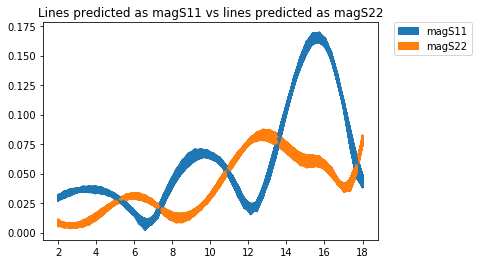

In [20]:
make_prediction_graph(classifier,
                      frequency_vals,
                      test_data)
plt.title("Lines predicted as magS11 vs lines predicted as magS22")
plt.show()